In [1]:
# Importing all necessary modules and functions for the project

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from scipy import stats

import acquire
import prepare

In [2]:
telco = acquire.get_telco_data()
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [3]:
train, validate, test = prepare.prep_telco_data(telco)

In [4]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,Female,0,No,No,58,Yes,Yes,Yes,Yes,Yes,...,0,0,0,1,0,0,0,1,0,0
1915,Male,0,No,Yes,71,Yes,Yes,Yes,Yes,No,...,0,0,0,1,0,1,0,1,0,0
5054,Female,0,Yes,Yes,35,Yes,Yes,No internet service,No internet service,No internet service,...,0,1,0,0,0,0,1,0,1,0
2355,Male,0,Yes,Yes,1,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,0,0,1,0,0,1
6279,Male,1,No,No,20,Yes,No,Yes,No,No,...,0,0,0,1,0,0,0,0,0,1


In [5]:
# Isna will confirm that I do not have 

train.isna().sum()

gender                                   0
senior_citizen                           0
partner                                  0
dependents                               0
tenure                                   0
phone_service                            0
multiple_lines                           0
online_security                          0
online_backup                            0
device_protection                        0
tech_support                             0
streaming_tv                             0
streaming_movies                         0
paperless_billing                        0
monthly_charges                          0
total_charges                            0
churn                                    0
contract_type                            0
internet_service_type                    0
payment_type                             0
binned_tenure                            0
gender_encoded                           0
partner_encoded                          0
dependents_

In [6]:
validate.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
816,Female,0,Yes,No,27,Yes,Yes,No,No,No,...,1,0,1,0,0,1,0,1,0,0
1488,Female,0,Yes,No,71,Yes,Yes,Yes,Yes,Yes,...,1,0,1,0,1,0,0,1,0,0
4796,Male,0,No,No,44,No,No phone service,Yes,No,Yes,...,1,0,1,1,0,0,0,0,1,0
3213,Female,0,Yes,Yes,27,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,1,0,1,0,0,1
5026,Male,0,Yes,Yes,62,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,1,0,1,1,0,0


In [7]:
# Isna will confirm that I do not have 

validate.isna().sum()

gender                                   0
senior_citizen                           0
partner                                  0
dependents                               0
tenure                                   0
phone_service                            0
multiple_lines                           0
online_security                          0
online_backup                            0
device_protection                        0
tech_support                             0
streaming_tv                             0
streaming_movies                         0
paperless_billing                        0
monthly_charges                          0
total_charges                            0
churn                                    0
contract_type                            0
internet_service_type                    0
payment_type                             0
binned_tenure                            0
gender_encoded                           0
partner_encoded                          0
dependents_

In [8]:
test.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
3311,Female,0,No,No,29,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,1,0,0,1,0,0,1
6330,Male,0,Yes,Yes,36,Yes,Yes,No internet service,No internet service,No internet service,...,0,1,0,0,1,0,1,1,0,0
6156,Male,1,No,No,1,Yes,No,No,No,No,...,0,0,0,0,0,0,0,0,1,0
5313,Male,0,No,No,25,Yes,No,No,No,No,...,0,0,0,0,0,1,0,0,1,0
1176,Female,0,Yes,No,34,Yes,No,No,No,No,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Isna will confirm that Ido not have 

test.isna().sum()

gender                                   0
senior_citizen                           0
partner                                  0
dependents                               0
tenure                                   0
phone_service                            0
multiple_lines                           0
online_security                          0
online_backup                            0
device_protection                        0
tech_support                             0
streaming_tv                             0
streaming_movies                         0
paperless_billing                        0
monthly_charges                          0
total_charges                            0
churn                                    0
contract_type                            0
internet_service_type                    0
payment_type                             0
binned_tenure                            0
gender_encoded                           0
partner_encoded                          0
dependents_

# Exploration

There are no nulls in my train, validate, and test datasets

In [10]:
train.columns.to_list()

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'binned_tenure',
 'gender_encoded',
 'partner_encoded',
 'dependents_encoded',
 'phone_service_encoded',
 'paperless_billing_encoded',
 'churn_encoded',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No internet service',
 'online_backup_Yes',
 'binned_tenure_2years',
 'binned_tenure_3years',
 'binned_tenure_4years',
 'binned_tenure_5years',
 'binned_tenure_6years',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No internet service',
 'streaming_tv_Yes',
 's

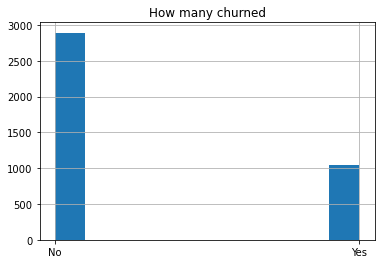

In [11]:
plt.title('How many churned')
train.churn.hist()
plt.show()

In [12]:
# To get the churn percentage
round(train.churn_encoded.mean(), 2)

0.27

**And also what columns have the most uneven distribution of their population** (Univariate exploration)

   **- Categorical data**

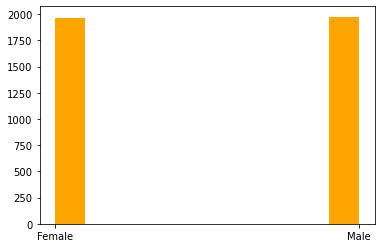

In [36]:
plt.hist(train['gender'], color='orange')
plt.show()

In [14]:
telco.gender.value_counts(normalize=True)*100

Male      50.47565
Female    49.52435
Name: gender, dtype: float64

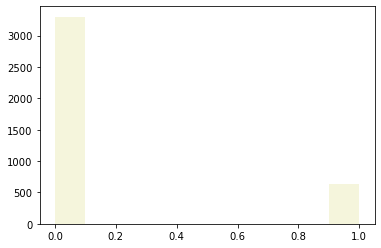

In [37]:
plt.hist(train['senior_citizen'], color='beige')
plt.show()

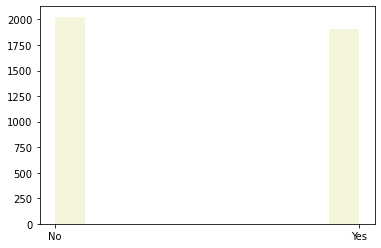

In [38]:
plt.hist(train['partner'], color='beige')
plt.show()

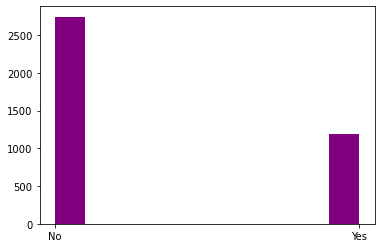

In [39]:
plt.hist(train['dependents'], color='purple')
plt.show()

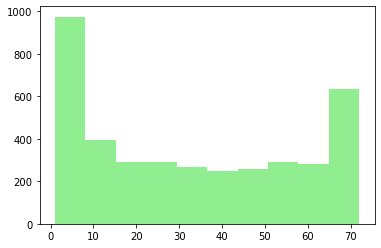

In [40]:
plt.hist(train['tenure'], color='lightgreen')
plt.show()

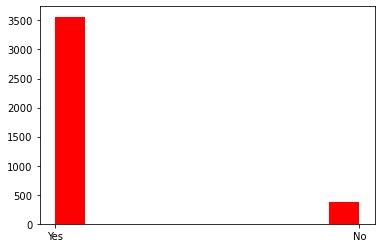

In [42]:
plt.hist(train['phone_service'], color='red')
plt.show()

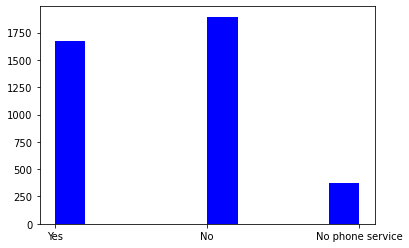

In [43]:
plt.hist(train['multiple_lines'], color='blue')
plt.show()

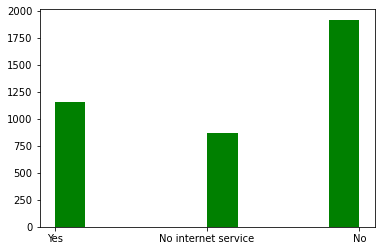

In [44]:
plt.hist(train['online_security'], color='green')
plt.show()

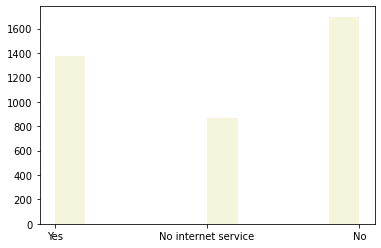

In [45]:
plt.hist(train['online_backup'], color='beige')
plt.show()

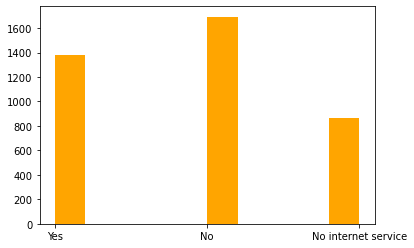

In [46]:
plt.hist(train['device_protection'], color='orange')
plt.show()

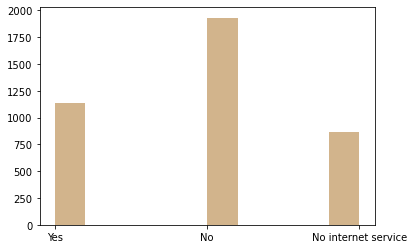

In [47]:
plt.hist(train['tech_support'], color='tan')
plt.show()

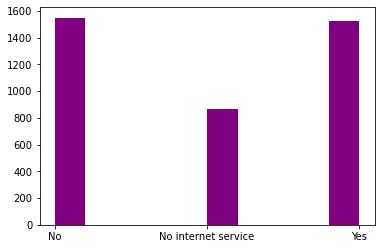

In [48]:
plt.hist(train['streaming_tv'], color='purple')
plt.show()

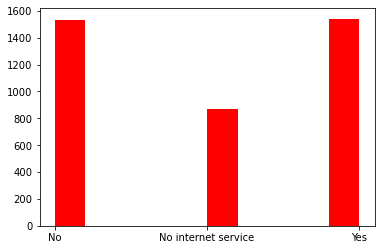

In [49]:
plt.hist(train['streaming_movies'], color='red')
plt.show()

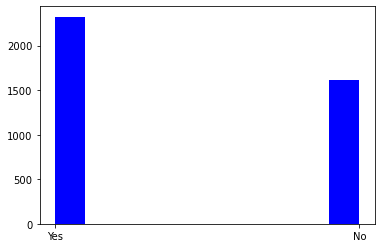

In [50]:
plt.hist(train['paperless_billing'], color='blue')
plt.show()

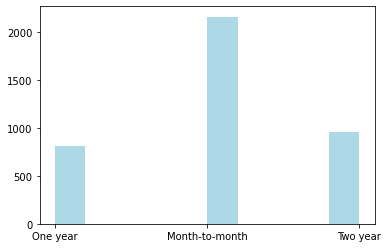

In [51]:
plt.hist(train['contract_type'], color='lightblue')
plt.show()

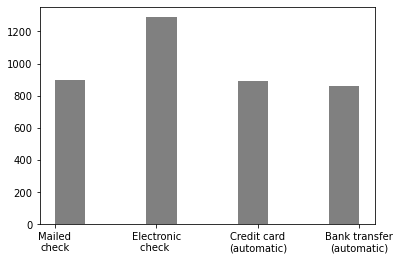

In [52]:
plt.hist(train['payment_type'], color='grey', )
plt.xticks([0, 1, 2, 3], ['Mailed\ncheck', 'Electronic\ncheck ', 'Credit card\n(automatic)', 'Bank transfer\n(automatic)'])
plt.show()

In [53]:
train.payment_type.value_counts(normalize=True)*100

Electronic check             32.740665
Credit card (automatic)      22.733045
Mailed check                 22.631445
Bank transfer (automatic)    21.894844
Name: payment_type, dtype: float64

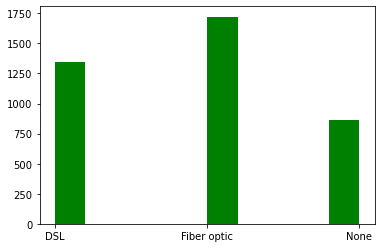

In [54]:
plt.hist(train['internet_service_type'], color='green')
plt.show()

   **- Numerical data**

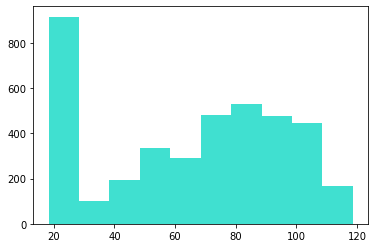

In [55]:
plt.hist(train['monthly_charges'], color='turquoise')
plt.show()

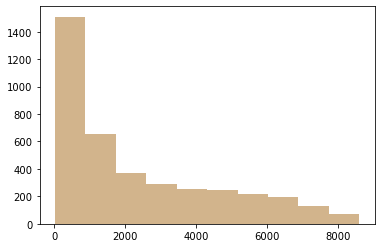

In [56]:
plt.hist(train['total_charges'], color='tan')
plt.show()

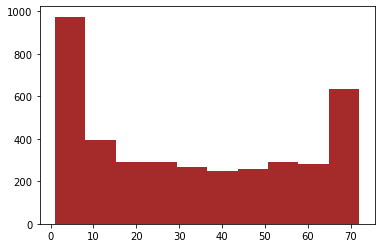

In [57]:
plt.hist(train['tenure'], color='brown')
plt.show()

- Except for gender and partner, the rest of the columns have a pretty uneven distribution of their population.
Some of the most important unevened ones are:
    * phone service
    * dependent
    * Tenure
    * Monthly charges
    * Paperless billing
    * Contract type
- Tenure and monthly charges have approximately the same distribution

## The big question now would be: who is churning?

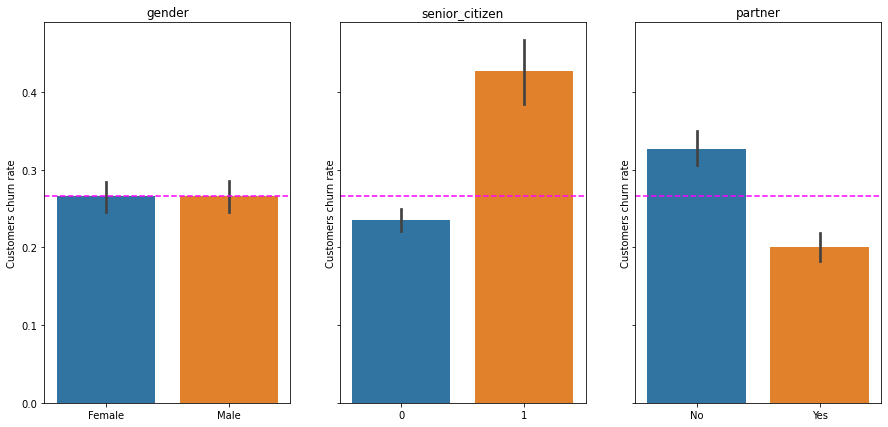

In [63]:
features = ['gender',
            'senior_citizen',
            'partner']

_,ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 7), sharey=True)

for i, feature in enumerate(features):
    '''
    Enumerate() function allows me to iterate inside the 'feature'
    variable containing a set of features from the DataFrame.
    I am plotting barplots using ax to plot several at the time.
    '''
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i])
    customers_churn_rate = train.churn_encoded.mean()
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Customers churn rate')
    ax[i].set_title(feature)
    ax[i].axhline(customers_churn_rate, ls='--', color='fuchsia')

### Takeaways
- Gender does not seem to have any impact on churn
- Senior citizens churn at a higher rate
- Those who have a partner churn at a higher rate

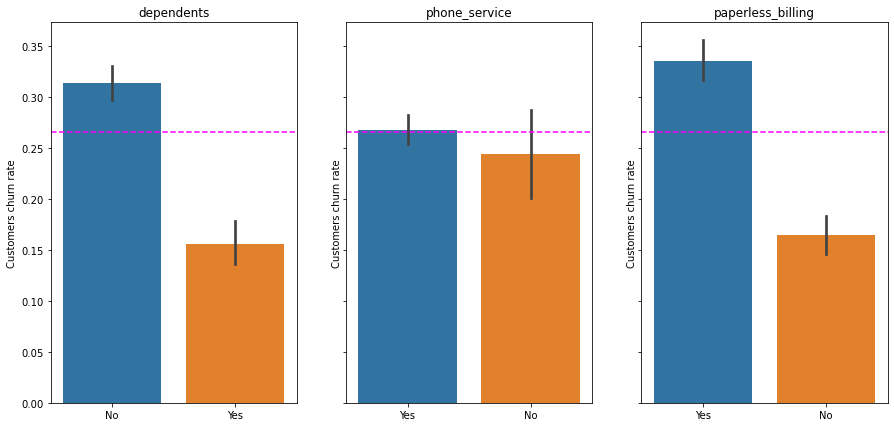

In [64]:
features = ['dependents',
            'phone_service',
            'paperless_billing']

_,ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 7), sharey=True)

for i, feature in enumerate(features):
    '''
    Enumerate() function allows me to iterate inside the 'feature'
    variable containing a set of features from the DataFrame.
    I am plotting barplots using ax to plot several at the time.
    '''
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i])
    customers_churn_rate = train.churn_encoded.mean()
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Customers churn rate')
    ax[i].set_title(feature)
    ax[i].axhline(customers_churn_rate, ls='--', color='fuchsia')

### Takeaways
- Those who have dependents churn at a higher rate than those who don't
- Not having a phone service makes a customer slighly more encline to churn
- Those using paperless stay more than those who aren't

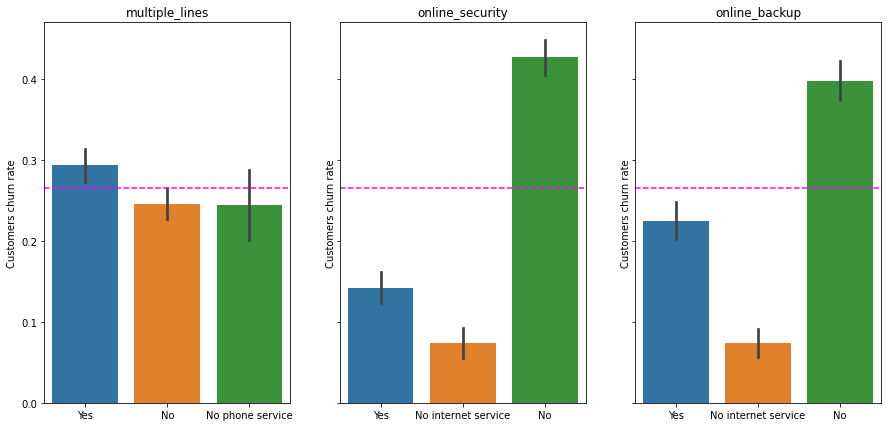

In [67]:
features = ['multiple_lines',
            'online_security',
            'online_backup']

_,ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 7), sharey=True)

for i, feature in enumerate(features):
    '''
    Enumerate() function allows me to iterate inside the 'feature'
    variable containing a set of features from the DataFrame.
    I am plotting barplots using ax to plot several at the time.
    '''
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i])
    customers_churn_rate = train.churn_encoded.mean()
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Customers churn rate')
    ax[i].set_title(feature)
    ax[i].customers_churn_rate = train
    ax[i].axhline(customers_churn_rate, ls='--', color='fuchsia')

### Takeaways
- Having multiple lines make customers less likely to churn than those who have 1 or no phone service
- Having online security or no internet service leads customers to churn
- Having online backup or no internet service leads customers to churn

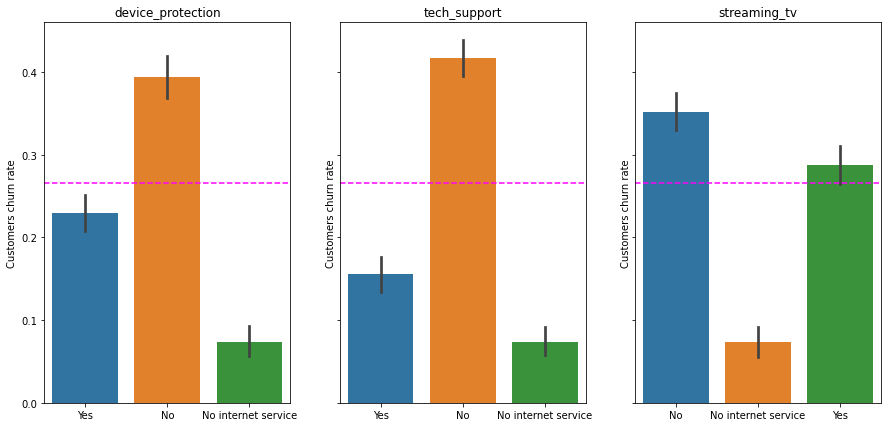

In [68]:
features = ['device_protection', \
            'tech_support', \
            'streaming_tv']

_,ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 7), sharey=True)

for i, feature in enumerate(features):
    '''
    Enumerate() function allows me to iterate inside the 'feature'
    variable containing a set of features from the DataFrame.
    I am plotting barplots using ax to plot several at the time.
    '''
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i])
    customers_churn_rate = train.churn_encoded.mean()
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Customers churn rate')
    ax[i].set_title(feature)
    ax[i].axhline(customers_churn_rate, ls='--', color='fuchsia')

### Takeaways
- Having device protection and tech support also leads customers to churn
- Not having internet service makes a customer more encline to churn

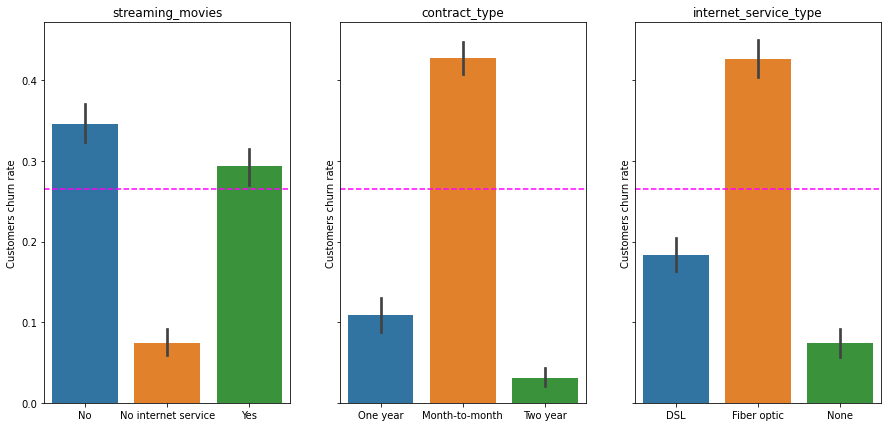

In [72]:
features = ['streaming_movies', \
            'contract_type', \
            'internet_service_type']

_,ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 7), sharey=True)

for i, feature in enumerate(features):
    '''
    Enumerate() function allows me to iterate inside the 'feature'
    variable containing a set of features from the DataFrame.
    I am plotting barplots using ax to plot several at the time.
    '''
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i])
    customers_churn_rate = train.churn_encoded.mean()
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Customers churn rate')
    ax[i].set_title(feature)
    ax[i].axhline(customers_churn_rate, ls='--', color='fuchsia')

### Takeaways
- Having device protection and tech support also leads customers to churn
- Not having internet service makes a customer more encline to churn

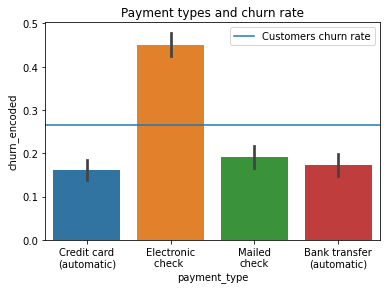

In [75]:
plt.title('Payment types and churn rate')
sns.barplot(x='payment_type', y='churn_encoded', data=train)
customers_churn_rate = train.churn_encoded.mean()
plt.axhline(customers_churn_rate, label= 'Customers churn rate')
plt.xticks([0, 1, 2, 3], ['Credit card\n(automatic)', 'Electronic\ncheck ', 'Mailed\ncheck', 'Bank transfer\n(automatic)'])
plt.legend()
plt.show()

In [76]:
train.payment_type.value_counts()

Electronic check             1289
Credit card (automatic)       895
Mailed check                  891
Bank transfer (automatic)     862
Name: payment_type, dtype: int64

## Takeaways
- Electronic check users are less likely to churn (who are they? investigate if I have time)
- The users of other types of payment churn at a similar rate

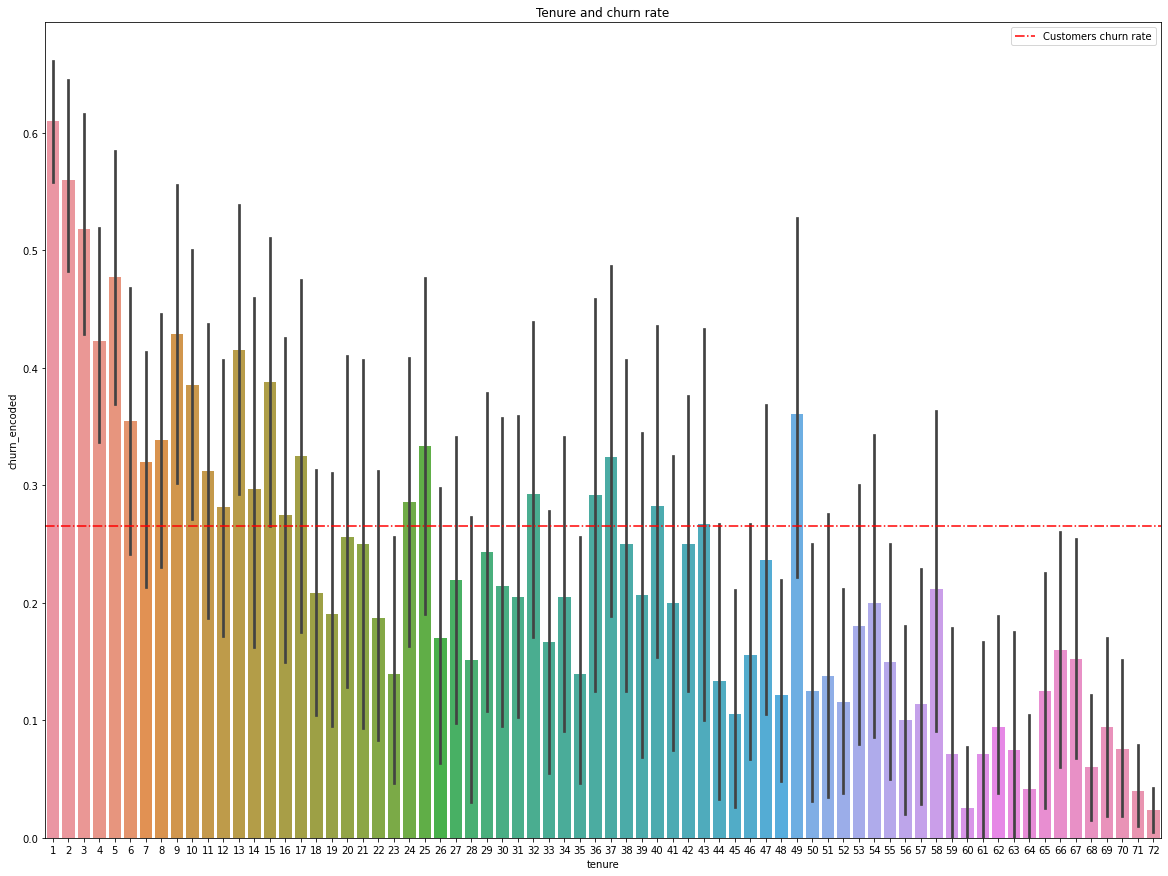

In [79]:
plt.figure(figsize=(20, 15))
plt.title('Tenure and churn rate')
sns.barplot(x='tenure', y='churn_encoded', data=train)
customers_churn_rate = train.churn_encoded.mean()
plt.axhline(customers_churn_rate, label= 'Customers churn rate', ls='-.', color='red')
plt.legend()
plt.show()

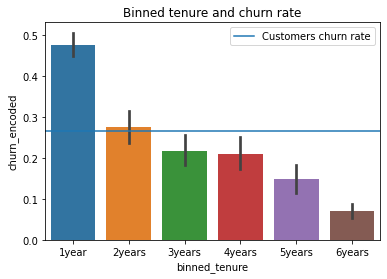

In [101]:
plt.title('Binned tenure and churn rate')
sns.barplot(x='binned_tenure', y='churn_encoded', data=train)
customers_churn_rate = train.churn_encoded.mean()
plt.axhline(customers_churn_rate, label= 'Customers churn rate', )
plt.legend()
plt.show()

## Takeaways
- The non-binned version of tenure has the same behavior as the binned one
- Higher tenure tend to churn more it seems

I do not have a normal distribution for tenure nor the other numeric values (monthly charges and total charges)
So I will use a t-test to understand the relationship between these features

In [ ]:
churn_sample = train[train.churn == 'Yes'].binned_tenure

churn_sample.hist()

Hypothesis setting

- Null hypothesis (): Mean of monthly charges of churned customers <= Mean of monthly charges of all customers
- Alternative hypothesis: Mean of monthly charges of churned customers > Mean of monthly charges of all customers

<AxesSubplot:>

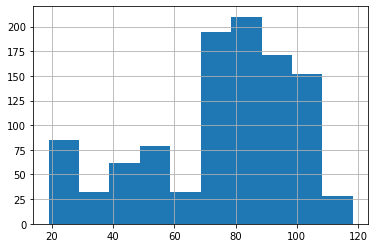

In [81]:
churn_sample = train[train.churn == 'Yes'].monthly_charges

churn_sample.hist()

In [ ]:
Hypothesis setting

Null hypothesis: Mean of monthly charges of churned customers <= Mean of monthly charges of all customers
Alternative hypothesis: Mean of monthly charges of churned customers > Mean of monthly charges of all customers

In [206]:
alpha = .05

null_hypothesis = 'tenure and churn rate are independent'
alternative_hypothesis ='higher tenure tend to churn more'

#Using a crosstab of churn to binned tenure
observed = pd.crosstab(train.churn, train.binned_tenure)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print('Reject null hypothesis')
    print('I have sufficient evidenc to say that', alternative_hypothesis)
else:
    print('Fail to reject null hypothesis')
    print('I do not have sufficient evidence to reject the null hypothesis')

Reject null hypothesis
I have sufficient evidenc to say that there is a relationship between churn and tenure


In [73]:
train.binned_tenure.value_counts()

1year     1220
6years     818
2years     532
3years     469
5years     459
4years     439
Name: binned_tenure, dtype: int64

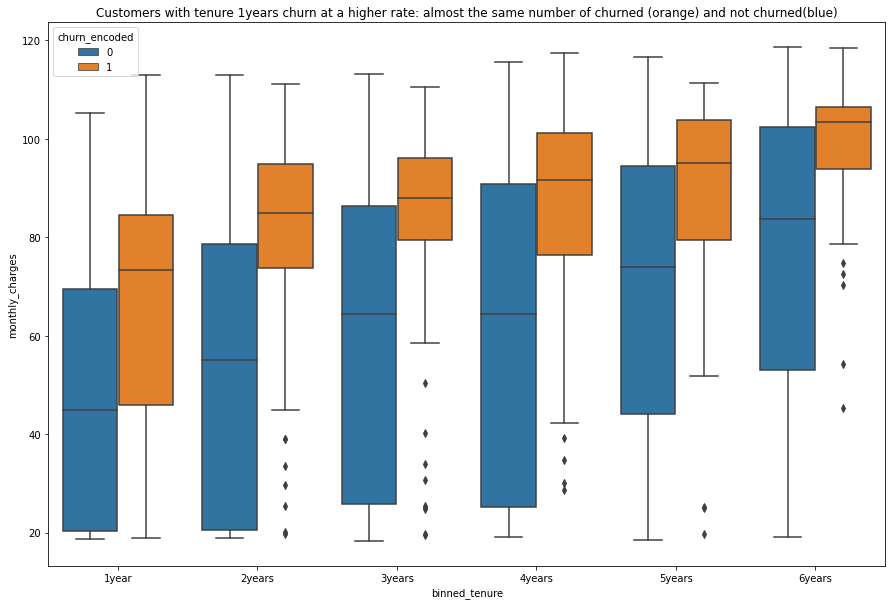

In [198]:
plt.figure(figsize=(15, 10))
plt.title('Customers with tenure 1years churn at a higher rate: almost the same number of churned (orange) and not churned(blue)')
sns.boxplot(x='binned_tenure', y='monthly_charges', data=train, hue='churn_encoded')
customer_churn_rate = train.churn_encoded.mean()
plt.show()

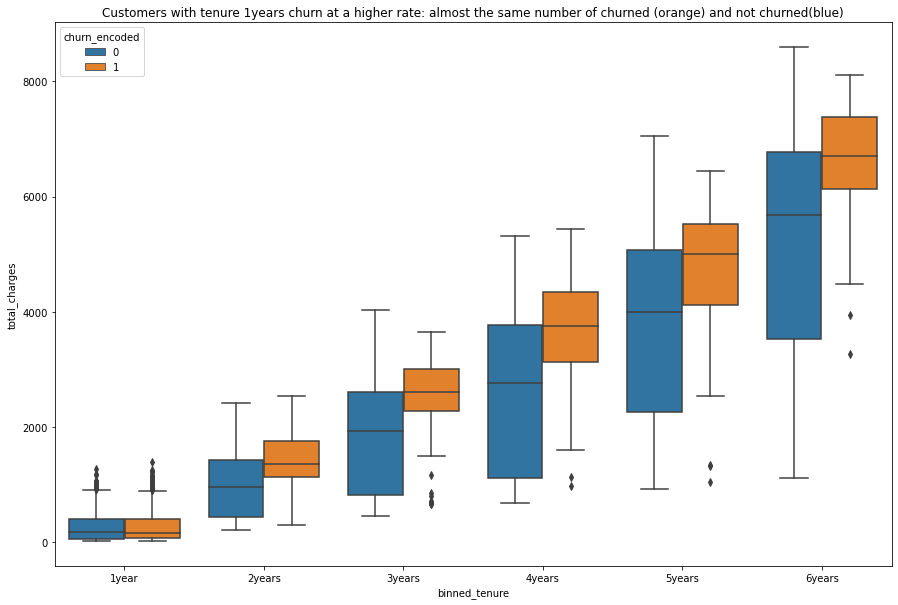

In [197]:
plt.figure(figsize=(15, 10))
plt.title('Customers with tenure 1years churn at a higher rate: almost the same number of churned (orange) and not churned(blue)')
sns.boxplot(x='binned_tenure', y='total_charges', data=train, hue='churn_encoded')
customer_churn_rate = train.churn_encoded.mean()
plt.show()

## Summary Takeaways

- Who are not getting internet services?
- Customers who do not have internet services churn the most
- In general those who have services like online back up, online security churn more
- Those who have services such as streaming tv and movie churn less
- Those who have a DSL connection churn more
- Those who hahve a 1year and 2year contract are more likely to churn
- Customers with tenure 1years churn at a higher rate: almost the same number of churned and not churned

# Modeling

## Decision trees

In [207]:
# I am going to drop all the non numeric columns

non_num = ['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'binned_tenure']

train = train.drop(columns=non_num)
train.head()

,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,1,0,0,1,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
1915,0,0,1,1,1,0,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
5054,1,1,1,1,1,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
2355,0,1,1,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
6279,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [208]:
train.columns.to_list()

['gender_encoded',
 'partner_encoded',
 'dependents_encoded',
 'phone_service_encoded',
 'paperless_billing_encoded',
 'churn_encoded',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No internet service',
 'online_backup_Yes',
 'binned_tenure_2years',
 'binned_tenure_3years',
 'binned_tenure_4years',
 'binned_tenure_5years',
 'binned_tenure_6years',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No internet service',
 'streaming_tv_Yes',
 'streaming_movies_No internet service',
 'streaming_movies_Yes',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check']

In [209]:
# I am going to drop all the non numeric columns

non_num = ['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'binned_tenure']

validate = validate.drop(columns=non_num)
validate.head()

,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
816,1,1,0,1,0,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0
1488,1,1,0,1,0,0,0,1,0,1,...,1,0,1,0,1,0,0,1,0,0
4796,0,0,0,0,1,0,1,0,0,1,...,1,0,1,1,0,0,0,0,1,0
3213,1,1,1,1,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,1
5026,0,1,1,1,0,0,0,0,1,0,...,0,1,0,0,1,0,1,1,0,0


In [210]:
# I am going to drop all the non numeric columns

non_num = ['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'binned_tenure']

test = test.drop(columns=non_num)
test.head()

,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
3311,1,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1
6330,0,1,1,1,0,0,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
6156,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5313,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1176,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [213]:

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['churn_encoded'])
y_train = train.churn_encoded

X_validate = validate.drop(columns=['churn_encoded'])
y_validate = validate.churn_encoded

X_test = test.drop(columns=['churn_encoded'])
y_test = test.churn_encoded

In [236]:
# Determining the proportion of not churned (0) vs churned (1)

round(y_train.value_counts(normalize=True)*100)

0    73.0
1    27.0
Name: churn_encoded, dtype: float64

In [216]:
# Using a decision Tree classifier, I will create a decision tree

clf = DecisionTreeClassifier(max_depth=2, random_state=75)

In [220]:
clf = clf.fit(X_train, y_train)

In [221]:
clf.classes_

array([0, 1])

[Text(474.30000000000007, 543.6, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]\nclass = Did not churn'),
 Text(237.15000000000003, 326.16, 'contract_type_Two year <= 0.5\ngini = 0.241\nsamples = 2215\nvalue = [1904, 311]\nclass = Did not churn'),
 Text(118.57500000000002, 108.72000000000003, 'gini = 0.319\nsamples = 1506\nvalue = [1206, 300]\nclass = Did not churn'),
 Text(355.725, 108.72000000000003, 'gini = 0.031\nsamples = 709\nvalue = [698, 11]\nclass = Did not churn'),
 Text(711.45, 326.16, 'binned_tenure_6years <= 0.5\ngini = 0.489\nsamples = 1722\nvalue = [987, 735]\nclass = Did not churn'),
 Text(592.8750000000001, 108.72000000000003, 'gini = 0.5\nsamples = 1355\nvalue = [667, 688]\nclass = Churned'),
 Text(830.0250000000001, 108.72000000000003, 'gini = 0.223\nsamples = 367\nvalue = [320, 47]\nclass = Did not churn')]

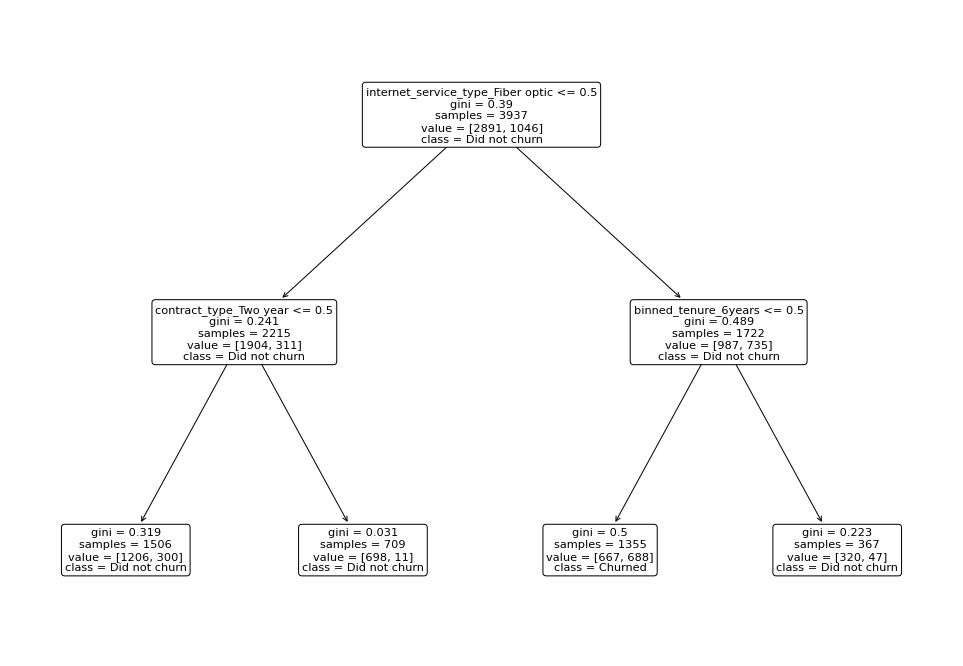

In [222]:
plt.figure(figsize=(17, 12))
plot_tree(clf, feature_names=X_train.columns, class_names=['Did not churn', 'Churned'], rounded=True)

In [223]:
# Evaluating the in-sample result with a prediction

y_pred = clf.predict(X_train)
y_pred[0:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [224]:
# Calculating its probability

y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:10]

array([[0.80079681, 0.19920319],
       [0.8719346 , 0.1280654 ],
       [0.80079681, 0.19920319],
       [0.80079681, 0.19920319],
       [0.80079681, 0.19920319],
       [0.49225092, 0.50774908],
       [0.98448519, 0.01551481],
       [0.80079681, 0.19920319],
       [0.49225092, 0.50774908],
       [0.98448519, 0.01551481]])

In [225]:
# Then its accuracy

format(clf.score(X_train, y_train))

'0.7396494792989586'

In [230]:
# Running a classification report matrix to find out more


pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,2224,667
1,358,688


In [231]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      2891
           1       0.51      0.66      0.57      1046

    accuracy                           0.74      3937
   macro avg       0.68      0.71      0.69      3937
weighted avg       0.77      0.74      0.75      3937



In [233]:
# Running several other model to see which one has the 

X_train_i = train.drop(columns=['churn_encoded'])
y_train_i = train.churn_encoded

for i in range(2, 11):
    best_depth = DecisionTreeClassifier(max_depth=i, random_state=175)

    best_depth = best_depth.fit(X_train_i, y_train_i)

    y_pred_i = best_depth.predict(X_train)

    report_i = classification_report(y_train, y_pred_i, output_dict=True)
    print(f'DecisionTree depth {i}\n')
    print(pd.DataFrame(report_i))
    print('\n=======================\n')

DecisionTree depth 2

                     0            1  accuracy    macro avg  weighted avg
precision     0.861348     0.507749  0.739649     0.684548      0.767402
recall        0.769284     0.657744  0.739649     0.713514      0.739649
f1-score      0.812717     0.573095  0.739649     0.692906      0.749053
support    2891.000000  1046.000000  0.739649  3937.000000   3937.000000


DecisionTree depth 3

                     0            1  accuracy    macro avg  weighted avg
precision     0.857555     0.559278  0.769368     0.708417      0.778308
recall        0.822553     0.622371  0.769368     0.722462      0.769368
f1-score      0.839689     0.589140  0.769368     0.714415      0.773122
support    2891.000000  1046.000000  0.769368  3937.000000   3937.000000


DecisionTree depth 4

                     0            1  accuracy    macro avg  weighted avg
precision     0.857850     0.580703  0.779782     0.719277      0.784216
recall        0.839156     0.615679  0.779782     0.72

## K-Nearest Neighbor